In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
data_1 = pd.read_csv('./output/03c_xgb_10_features_shap_vs_thrombolysis.csv')
data_2 = pd.read_csv('./output/04_xgb_10_features_10k_cohort_shap_vs_10k_thrombolysis.csv')

In [3]:
data_2

,Unnamed: 0,Thrombolysis rate,mean SHAP value,mean SHAP main effect
0,VKKDD9172T,0.4527,1.321657,1.115862
1,GKONI0110I,0.4132,0.869633,1.015091
2,HPWIF9956L,0.4131,1.104536,1.009449
3,CNBGF2713O,0.4093,1.029775,1.269929
4,TPXYE0168D,0.3962,0.852834,0.870560
...,...,...,...,...
127,LECHF1024T,0.1478,-1.251271,-1.022341
128,LGNPK4211W,0.1445,-1.244909,-1.200278
129,OUXUZ1084Q,0.1295,-1.066949,-1.010345
130,HZMLX7970T,0.1149,-1.270621,-1.274181


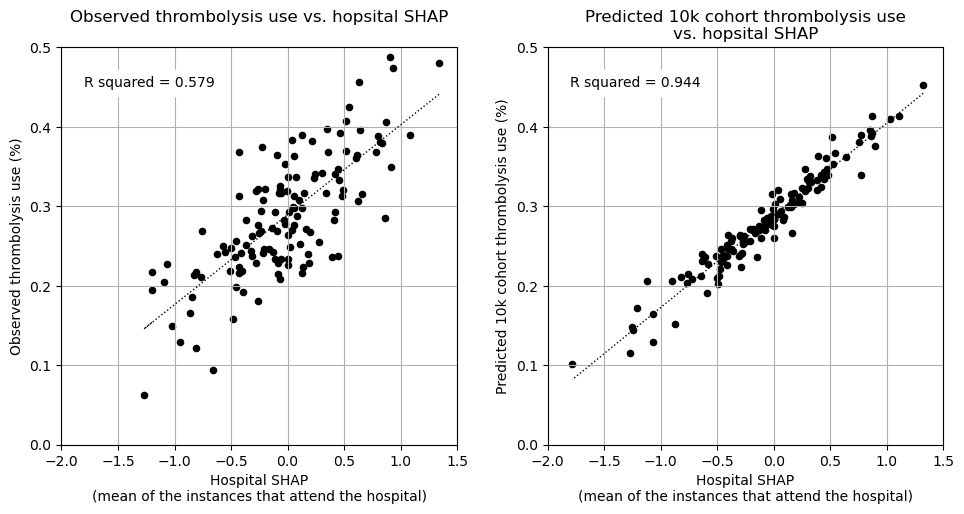

In [4]:
fig = plt.figure(figsize=(10,5.5))


## Observed thrombolysis use
ax1 = fig.add_subplot(121)
x1 = data_1['shap_mean_sv']
y1 = data_1['Thrombolysis']
ax1.scatter(x1, y1, s=20, c='k')

# Fit a regression line to the x1 points
slope1, intercept1, r_value1, p_value1, std_err1 = \
    stats.linregress(x1, y1)
r_square1 = r_value1 ** 2
y_pred1 = intercept1 + (x1 * slope1)
ax1.plot (x1, y_pred1, color = 'k', linestyle=':', linewidth=1)

ax1.set_xlabel("Hospital SHAP\n(mean of the instances that attend the hospital)")
ax1.set_ylabel('Observed thrombolysis use (%)')
ax1.set_title ('Observed thrombolysis use vs. hopsital SHAP\n')
ax1.grid()
txt1 = f'R squared = {r_square1:0.3f}'
ax1.text(-1.8, 0.45, txt1, bbox=dict(facecolor='white', edgecolor='white'))
ax1.set_xlim(-2,1.5)
ax1.set_ylim(0, 0.5)

## 10k thrombolysis use
ax2 = fig.add_subplot(122)
x2 = data_2['mean SHAP value']
y2 = data_2['Thrombolysis rate']
ax2.scatter(x2, y2, s=20, c='k')

# Fit a regression line to the x1 points
slope2, intercept2, r_value2, p_value2, std_err2 = \
    stats.linregress(x2, y2)
r_square2 = r_value2 ** 2
y_pred2 = intercept2 + (x2 * slope2)
ax2.plot (x2, y_pred2, color = 'k', linestyle=':', linewidth=1)

ax2.set_xlabel("Hospital SHAP\n(mean of the instances that attend the hospital)")
ax2.set_ylabel('Predicted 10k cohort thrombolysis use (%)')
ax2.set_title ('Predicted 10k cohort thrombolysis use\nvs. hopsital SHAP')
ax2.grid()
txt2 = f'R squared = {r_square2:0.3f}'
ax2.text(-1.8, 0.45, txt2, bbox=dict(facecolor='white', edgecolor='white'))
ax2.set_xlim(-2,1.5)
ax2.set_ylim(0, 0.5)

plt.tight_layout(pad=2)
plt.savefig('./output/99_twin_correlation_scatter.jpg', dpi=300)
plt.show()